# Modeling

In [59]:
# Importing the necessary packages 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import joblib

import warnings
warnings.filterwarnings('ignore')

## Logistic Regression

In [ ]:
# Loading the dataset 

apple_df = pd.read_csv('../clean_apple_stocks.csv')

In [ ]:
apple_df.head(5)

In [ ]:
apple_df.shape

In [ ]:
# Applying Logistic Regression 

# Assigning Variables 

X = apple_df.drop(['Adj Closing Price Change', 'Date'], axis= 1)
y = apple_df['Adj Closing Price Change']

In [ ]:
# Split into train/test 

# Import the package 

from sklearn.model_selection import train_test_split

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [ ]:
# Viewing the shape of our train/test split 

#print(f"The shape of our train set is {}")

In [ ]:
# Scaling the data 

# Import the package 

from sklearn.preprocessing import StandardScaler

# Scaling 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression

#Importing the package 
from sklearn.linear_model import LogisticRegression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

---

Based on EDA 2 

In [ ]:
# Loading our clean dataset from the EDA - 2 Notebook 

stocks_df = pd.read_csv('../clean_data.csv')

In [ ]:
# Viewing our dataframe 

stocks_df.head(10)

In [ ]:
# Shape of our dataframe 



In [ ]:
# Applying Logistic Regression 

# Assigning Variables 

X = stocks_df.drop(['Open', 'Adj Closing Price Change', 'High', 'Low', 'Close'], axis= 1)
y = stocks_df['Adj Closing Price Change']

In [ ]:
# Split into train/test 

# Import the package 

from sklearn.model_selection import train_test_split

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [ ]:
# Scaling the data 

# Import the package 

from sklearn.preprocessing import StandardScaler

# Scaling 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression

#Importing the package 
from sklearn.linear_model import LogisticRegression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

In [ ]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test_scaled)

###  = print my confusion matrix 

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

### After sampling:

In [5]:
# Loading our balanced dataset from the EDA - 2 Notebook 

balanced_df = pd.read_csv('../sample_balanced_data.csv')

In [6]:
balanced_df.head(5)

,Adj Close,Adj Closing Yday,Adj Closing Price Change
0,10.402975,10.675164,0
1,14.873996,15.113414,0
2,24.063576,24.079828,0
3,154.064896,156.960358,0
4,36.336582,36.823406,0


In [7]:
balanced_df['Adj Closing Price Change'].value_counts()

0    19402
1    19402
Name: Adj Closing Price Change, dtype: int64

In [8]:
# Applying Logistic Regression 

# Assigning Variables 

X_balanced = balanced_df.drop(['Adj Closing Price Change'], axis= 1)
y_balanced = balanced_df['Adj Closing Price Change']

In [9]:
# Split into train/test 

# Import the package 

from sklearn.model_selection import train_test_split

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [10]:
# Scaling the data 

# Import the package 

from sklearn.preprocessing import MinMaxScaler

# Scaling 

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

- Why use a min max scaler?

In [11]:
# Logistic Regression

#Importing the package 
from sklearn.linear_model import LogisticRegression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

Train score 0.5332044732845506
Validation score 0.5277010859561936
Test score 0.5272289984538739


In [12]:
y_pred = logreg.predict(X_test_scaled)


In [13]:
# Confusion Matrix 

#Import the confusion matrix libraries

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,4691,1130
True Positive,4374,1447


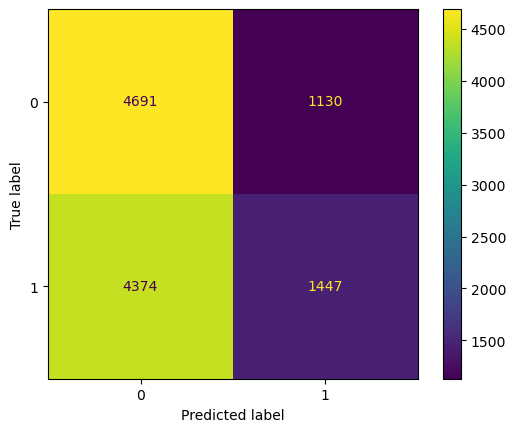

In [14]:
# Confusion Matrix Display 

ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

In [15]:
# Classification Report 

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.52      0.81      0.63      5821
           1       0.56      0.25      0.34      5821

    accuracy                           0.53     11642
   macro avg       0.54      0.53      0.49     11642
weighted avg       0.54      0.53      0.49     11642



In [16]:
# Creating a pipeline to optimize logreg

from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
# Pipeline

estimators = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
]

In [18]:
# 
from tempfile import mkdtemp
cachedir = mkdtemp()

# 
my_pipe = Pipeline(estimators, memory=cachedir)

In [19]:
# logistic Regression

logreg_params = {
    'scaler': [MinMaxScaler()],
    'model': [LogisticRegression(random_state = 1)],
    'model__solver': ['liblinear', 'lbfgs'],
    'model__penalty': ['l1','l2'],
    'model__max_iter': [50000]
}

In [20]:
# 

logreg_grid = GridSearchCV(my_pipe, param_grid =logreg_params, cv = 5, verbose = 2)

In [21]:
X_rem.shape

(27162, 2)

In [22]:
X_rem.describe()

,Adj Close,Adj Closing Yday
count,27162.000000,27162.000000
mean,129.150691,129.151399
std,265.642164,265.254020
min,0.781822,0.791242
25%,28.386334,28.510000
50%,56.796926,56.788982
75%,115.758698,115.717501
max,3681.679932,3677.360107


In [23]:
# 

logreg_fit_grid = logreg_grid.fit(X_rem, y_rem.values.ravel())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=liblinear, scaler=MinMaxScaler(); total time=  11.8s
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=liblinear, scaler=MinMaxScaler(); total time=  11.9s
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=liblinear, scaler=MinMaxScaler(); total time=  11.2s
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=liblinear, scaler=MinMaxScaler(); total time=  11.6s
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=liblinear, scaler=MinMaxScaler(); total time=  11.5s
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=lbfgs, scaler=MinMaxScaler(); tot

In [24]:
# 

print(f"best score: {logreg_fit_grid.best_score_}")
print(f"best parameters: {logreg_fit_grid.best_params_}")

best score: 0.9850156966359782
best parameters: {'model': LogisticRegression(max_iter=50000, penalty='l1', random_state=1,
                   solver='liblinear'), 'model__max_iter': 50000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'scaler': MinMaxScaler()}


- Re do logistic regression with the best parameters 
- Observations 

In [ ]:
#save best model 

import joblib 

joblib.dump(logreg_fit_grid, 'logreg.pkl')

## SVM - Support Vector Machines

In [25]:
from sklearn.svm import LinearSVC

SVM_model = LinearSVC(random_state=1)

SVM_model.fit(X_train_scaled, y_train)

print("Train score", SVM_model.score(X_train_scaled, y_train))
print("Validation score", SVM_model.score(X_val_scaled, y_val))
print("Test score", SVM_model.score(X_test_scaled, y_test))

Train score 0.6546550692622762
Validation score 0.6484446898582735
Test score 0.648943480501632


In [26]:
y_pred_SVM = SVM_model.predict(X_test_scaled)

In [27]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_SVM)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,5323,498
True Positive,3589,2232


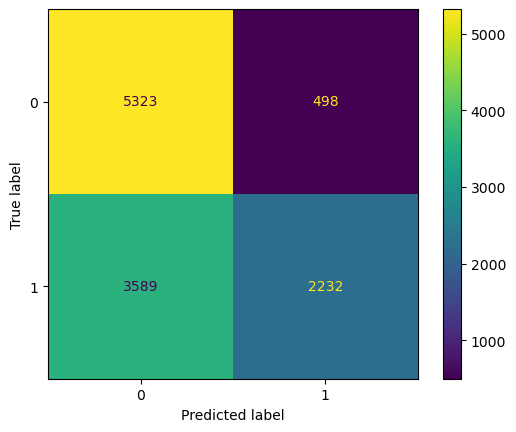

In [28]:

ConfusionMatrixDisplay.from_estimator(SVM_model, X_test_scaled, y_test)

In [29]:
from sklearn.metrics import classification_report

report_svm = classification_report(y_test, y_pred_SVM)
print(report_svm)

              precision    recall  f1-score   support

           0       0.60      0.91      0.72      5821
           1       0.82      0.38      0.52      5821

    accuracy                           0.65     11642
   macro avg       0.71      0.65      0.62     11642
weighted avg       0.71      0.65      0.62     11642



In [53]:
# SVM Pipeline 

svm_params = {
    'scaler': [MinMaxScaler()],
    'model': [LinearSVC(random_state = 1)],
    'model__C': [0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['l1','l2'],
    'model__max_iter': [50000]
}

In [54]:
svm_grid = GridSearchCV(my_pipe, param_grid =svm_params, cv = 5, verbose = 2)

In [55]:
svm_fit_grid = svm_grid.fit(X_rem, y_rem.values.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l1, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l1, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l1, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l1, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l1, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l2, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalt

In [57]:
# 

print(f"best score: {svm_fit_grid.best_score_}")
print(f"best parameters: {svm_fit_grid.best_params_}")

best score: 0.9851997773384544
best parameters: {'model': LinearSVC(C=100, max_iter=50000, random_state=1), 'model__C': 100, 'model__max_iter': 50000, 'model__penalty': 'l2', 'scaler': MinMaxScaler()}


In [60]:
#save best model 

joblib.dump(svm_fit_grid, 'svm.pkl')

['svm.pkl']

## Random Forest 

In [61]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=1) 

random_forest_model.fit(X_train_scaled, y_train)

print("Train score", random_forest_model.score(X_train_scaled, y_train))
print("Validation score", random_forest_model.score(X_val_scaled, y_val))
print("Test score", random_forest_model.score(X_test_scaled, y_test))

Train score 1.0
Validation score 0.9565617522547396
Test score 0.9559354062875794


In [62]:
y_pred_rf = random_forest_model.predict(X_test_scaled)

In [63]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,5562,259
True Positive,254,5567


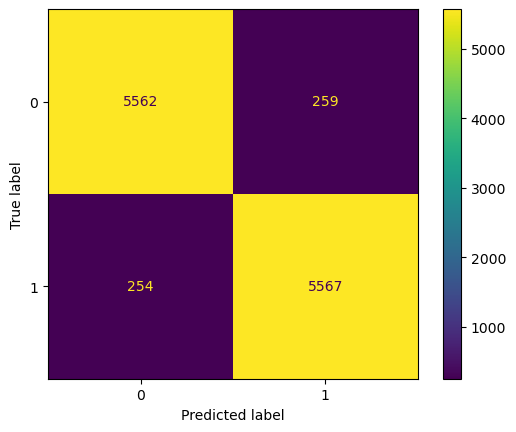

In [64]:

ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test_scaled, y_test)

In [65]:
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5821
           1       0.96      0.96      0.96      5821

    accuracy                           0.96     11642
   macro avg       0.96      0.96      0.96     11642
weighted avg       0.96      0.96      0.96     11642



In [80]:
# Random Forest Pipeline 

rf_params = {
    'scaler': [MinMaxScaler()],
    'model': [RandomForestClassifier(random_state = 1)],
    'model__n_estimators': range(50, 201, 50),
    'model__max_depth': range(3, 12, 2)
}

In [81]:
rf_grid = GridSearchCV(my_pipe, param_grid =rf_params, cv = 5, verbose = 2)

In [82]:
rf_fit_grid = rf_grid.fit(X_rem, y_rem.values.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.3s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.3s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.3s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.4s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.3s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=3, model__n_estimators=100, scaler=MinMaxScaler(); total time=   0.6s
[CV] END model=RandomForestClassifier(random_state=1), model__max_depth=3, model__n_estimat

In [83]:
# 

print(f"best score: {rf_fit_grid.best_score_}")
print(f"best parameters: {rf_fit_grid.best_params_}")

best score: 0.8170612037331455
best parameters: {'model': RandomForestClassifier(max_depth=11, n_estimators=200, random_state=1), 'model__max_depth': 11, 'model__n_estimators': 200, 'scaler': MinMaxScaler()}


In [70]:
#save best model 

joblib.dump(rf_fit_grid, 'random_forest.pkl')

['random_forest.pkl']

## XG Boost 

In [71]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(random_state=1)

xgbc.fit(X_train_scaled, y_train)

print("Train score", xgbc.score(X_train_scaled, y_train))
print("Validation score", xgbc.score(X_val_scaled, y_val))
print("Test score", xgbc.score(X_test_scaled, y_test))

Train score 0.9627226287449951
Validation score 0.913491625253083
Test score 0.9081772891255798


In [72]:
y_pred_xg = xgbc.predict(X_test_scaled)

In [73]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_xg)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,5266,555
True Positive,514,5307


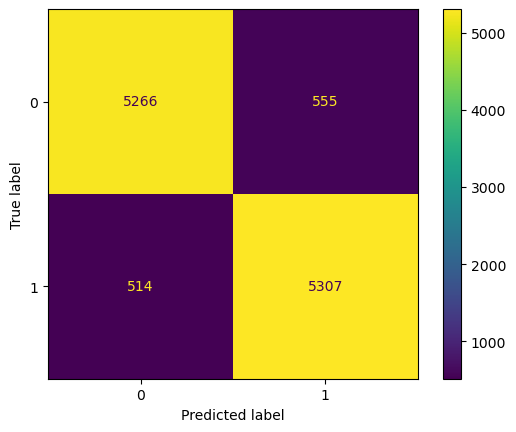

In [74]:

ConfusionMatrixDisplay.from_estimator(xgbc, X_test_scaled, y_test)

In [75]:
report_xg = classification_report(y_test, y_pred_xg)
print(report_xg)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      5821
           1       0.91      0.91      0.91      5821

    accuracy                           0.91     11642
   macro avg       0.91      0.91      0.91     11642
weighted avg       0.91      0.91      0.91     11642



In [88]:
# XG Boost Pipeline 

xg_params = {
    'scaler': [MinMaxScaler()],
    'model': [XGBClassifier(random_state = 1)],
    'model__n_estimators': range(50, 501, 50),
    'model__max_depth': range(3, 22, 2),
    'model__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1.2]
}

In [89]:
xg_grid = GridSearchCV(my_pipe, param_grid =xg_params, cv = 5, verbose = 2)

In [90]:
xg_fit_grid = xg_grid.fit(X_rem, y_rem.values.ravel())

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...), model__learning_rate=0.1, model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.1s
[CV] END model=XGBClassifier(base_score=None, booster=None,

In [87]:
# 

print(f"best score: {xg_fit_grid.best_score_}")
print(f"best parameters: {xg_fit_grid.best_params_}")

best score: 0.9507770248199583
best parameters: {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...), 'model__learning_rate': 0.7, 'model__max_depth': 11, 'model__n_estimators': 200, 'scaler': MinMaxScaler()}


In [ ]:
#save best model 

joblib.dump(xg_fit_grid, 'xgboost.pkl')